## K-means Clustering and Spectral Clustering
In class, we have learned k-means clustering and spectral clustering. In this section, we will take through some experiments to illustrate how they work and difference. We are going to use `numpy` and `matplotlib` packages in Python, make sure to import them first.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
k=3

Our experiment consists of two sub-experiments:
- K-means clustering.
- Spectral clustering.

Each sub-experiment consists of 3 steps:
1. Implementation of algorithms.
2. Experiments, including data generation and visualization of experimental results.
3. Discussion, including bonus and analytical questions.

There might be some analytical questions and bonus in the end of each experiment.

### K-means clustering
#### Implementation
Given input data $\left\{\mathbf x^{(1)}, \ldots, \mathbf x^{(m)}\right\}, \mathbf x^{(i)} \in \mathbb{R}^{n}$, k-means algorithm partitions the input into $k \leq m$ clusters $C_1, \ldots, C_k$ to minimize the with-cluster sum of squares (WCSS): 
$$
\arg\min_{\mathbf C} \sum_{j=1}^{k} \sum_{\mathbf x \in C_{j}}\left\|\mathbf x -\mu_{j}\right\|^{2},
$$
where $\mu_j$ is the centroid of $j$-th cluster: 
$$
\mu_j = \frac{1}{\vert C_j \vert} \sum_{\mathbf x \in C_{j}} \mathbf x.
$$

However, optimal k-means clustering is *NP-hard* in Euclidean space. The naive k-means algorithm, also known as Lloyd's algorithm, uses an iterative refinement technique. Let $c^{i} \in {1, \ldots, k}$ be the cluster label for $\mathbf x^{i}$, and we have pseudocode for naive k-means clustering as follows:

> Initialize cluster centroids $\mu_1,\ldots ,\mu_k \in \mathbb R^n $ randomly.<br>
Repeat until convergence \{ <br>
&nbsp;&nbsp;&nbsp;&nbsp;For every $i$,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$c^{i}:= \arg\min_j \| \mathbf x^{(i)} - \mu_j  \|^2 $ <br>
&nbsp;&nbsp;&nbsp;&nbsp;For each $j$,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\mu_j:=\frac{\sum_{i=1}^{m} \mathbf{1}\left\{c^{(i)}=j\right\} x^{(i)}}{\sum_{i=1}^{m} \mathbf{1}\left\{c^{(i)}=j\right\}}$<br>
\}

**Q1. Implement naive k-means clustering by completing following codes. The input parameters includes the data points and number of clusters. You can also choose to set the initialization method (see bonus question) and maximum of iteration times. The output contains cluster labels (${m \times 1}$ array), centroids of clusters (${k \times n }$ array) and WCSS (a scalar)**. 

In [2]:
def kmeans(data, k, init=None, max_iteration=10):
    m = data.shape[0]
    n = data.shape[1]
    if init is None:
        # random initialization
        centroids = data[np.random.choice(m, k, replace=False)]
    elif callable(init):
        # init should be callable
        centroids = init(data, k)
    else:
        # directly get the initialized centroids from input
        centroids = init
    labels =np.zeros(m,dtype=int)
    wcss = 1e5
    ############################
    ## start of your code
    # get the labels through centroids first
    squared_dists =  np.sum((data[:,None] - centroids)**2, axis=2)
    labels = np.argmin(squared_dists, axis=1)
    ## end of your code
    ############################
    
    for iter in range(max_iteration):
        ############################
        ## start of your code
        # update centroids according to labels
        selector = (labels == np.arange(k)[:,None]).astype(float)
        centroids = (selector @ data) / (np.sum(selector, axis=1)[:, None])
        # compute new labels through updated centroids
        squared_dists =  np.sum((data[:,None] - centroids)**2, axis=2)
        labels = np.argmin(squared_dists, axis=1)
        ## end of your code
        ############################
        pass
    
    ############################    
    ## start of your code 
    # compute wcss
    wcss = np.sum((data - centroids[labels])**2)
    #
    ## end of your code
    ############################
    return labels, centroids, wcss

#### Experiments
Now we can write some simple codes to test our algorithm. First, we will randomly generate 3 clusters based on 3 different Gaussian distribution.

In [3]:
# generate data
data = np.random.multivariate_normal( (2,2), cov=[[0.25, 0], [0, 0.25]], size=100)
data = np.vstack((data, np.random.multivariate_normal( (-2, 1), cov=[[0.25, 0], [0, 0.25]], size=100)))
data = np.vstack((data, np.random.multivariate_normal( (1, -2), cov=[[0.25, 0], [0, 0.25]], size=100)))

Then, apply k-means algorithm on generated dataset and visualize the results. 

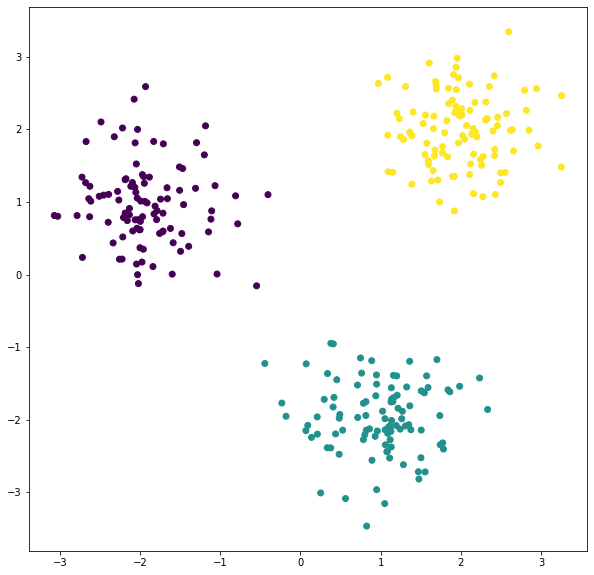

In [4]:
# visualize the results
labels, _, _ = kmeans(data, k)
plt.figure(figsize=(10, 10))
plt.scatter(data[:,0], data[:,1], c=labels)

#### Discussion
In class, we know that initialization of the k-means clustering has a large effect on the performance. Obviously, uniformly random sampling is not a good choice. **K-means++** is an impoved initialization algorithm for k-means clustering.  It's based on a simple intuition: if a point is far away from current cluster centroids, it is more likely to belong to other clusters. Therefore, k-means++ spreads out the cluster centroids based on distance.The exact algorithm is as follows:
> Choose $\mu_1$ uniformly at random among the data points, set $t=2$.<br>
Repeat until $t>k$  \{ <br>
&nbsp;&nbsp;&nbsp;&nbsp;For every $i$,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(compute the squared distance between point $\mathbf x^{(i)}$ and nearest cluster centroid)<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$d^{(i)}:= \min_j \| \mathbf x^{(i)} - \mu_j  \|^2, j< t  $<br>
&nbsp;&nbsp;&nbsp;&nbsp;For every $i$,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(compute the probability based on nearest distance)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$p^{(i)}:= \frac{d^{(i)}}{\sum_{j}^m d^{(j)}}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;Choose $\mu_{t}$ randomly among the data points based on probability distribution $P = \{p^{(1)},\ldots,p^{(m)}\}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$t:= t+1$<br>
\}

**Bonus: Now, implement k-means++ algorithm by completing following codes. *Hint: given a 1-D array and the associated probabilities, you can use `np.random.choice` to generate some random samples.***

In [5]:
def kmeanspp(data, k):
    m = data.shape[0]
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        ############################
        ## start of your codes
        # compute i-th centroid
        if i == 0:
            centroids = np.array(data[np.random.choice(m, 1)])
        else:
            squared_dists = np.sum((data[:,None] - centroids)**2, axis=2)
            nearest_squared_dists = np.min(squared_dists, axis=1)
            prob = nearest_squared_dists / np.sum(nearest_squared_dists)
            centroids = np.vstack((centroids, data[np.random.choice(m, 1, p=prob)]))
        ## end of your codes
        ############################
        pass
    return centroids

To illustrate the difference between random initialization and k-means++, we will do k-means clustering 1000 times and print the average of WCSS for each initialization method.

In [6]:
repeat_times = 1000
sum_wcss_random = 0
sum_wcss_kmeanspp = 0
for i in range(repeat_times):
    _, _, wcss = kmeans(data, k)
    sum_wcss_random += wcss 
    _, _, wcss = kmeans(data, k, init=kmeanspp)
    sum_wcss_kmeanspp += wcss
print("average of WCSS (random):", sum_wcss_random/repeat_times)
print("average of WCSS (k-means++):", sum_wcss_kmeanspp/repeat_times)

average of WCSS (random): 245.2803963092714
average of WCSS (k-means++): 165.52392668308755


**Drawback of k-means**. Now, let us generate some circles as clusters. The data points are sampled based on these circles. 

In [7]:
# generate circle data
true_labels = []
for i in range(k):
    r = np.random.normal(loc=0.1 * i, scale=0.005, size=100)
    angle = np.random.rand(100) * 2 * np.pi
    if i == 0:
        data = np.array([np.cos(angle) * r, np.sin(angle) * r]).T 
    else:
        data = np.vstack((data, np.array([np.cos(angle) * r, np.sin(angle) * r]).T ))
    true_labels = true_labels + [i for _ in range(100)]

Run following code to apply k-means on such data points and visualize the results.

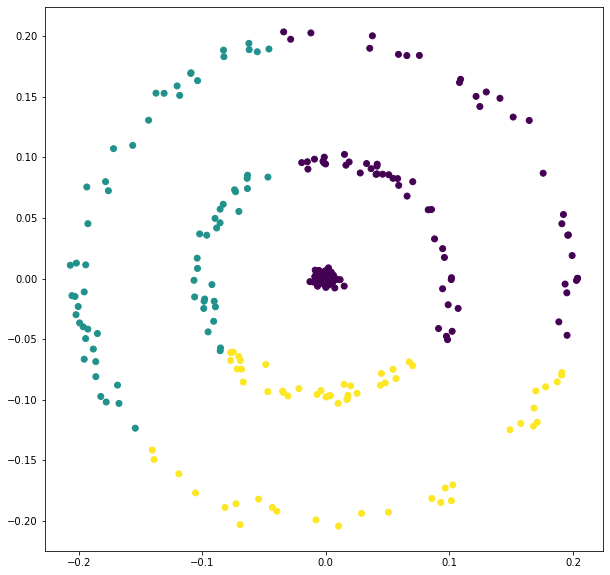

In [8]:
# kmeans
labels, centroids, _ = kmeans(data, k, init=kmeanspp,  max_iteration=10)
plt.figure(figsize=(10, 10))
plt.scatter(data[:,0], data[:,1], c=labels, alpha=5 )

The result is not acceptable. By running following code, we can visualize the partition of the space generated by k-means algorithm.

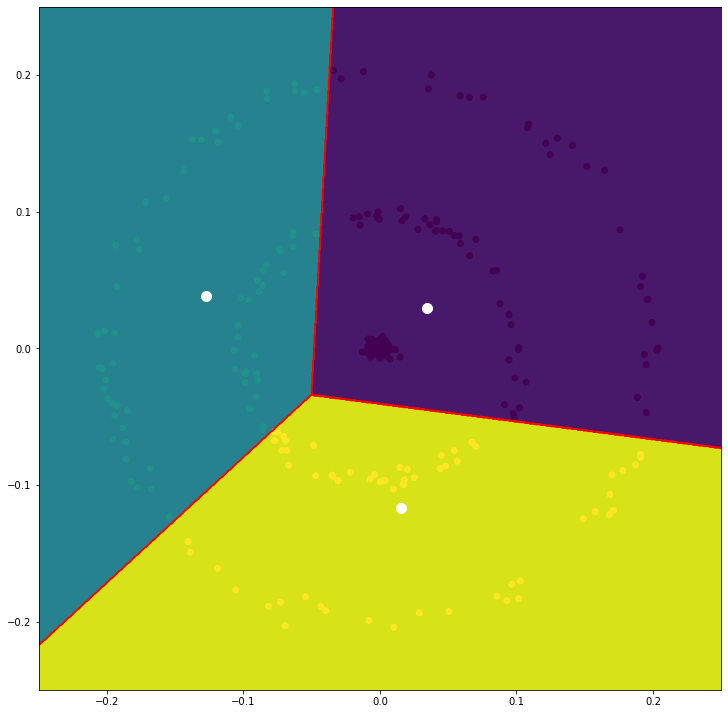

In [9]:
grid_len = 1000
x_axis = np.linspace(-0.25, 0.25, grid_len)
y_axis = np.linspace(-0.25, 0.25, grid_len)
xx, yy = np.meshgrid(x_axis,y_axis)
grids = np.hstack((xx.reshape(-1, 1),yy.reshape(-1, 1)))
# Set max_iteration as 0, so we can get the labels without changing cluster centroids.
Z, _, _ = kmeans(grids, k, init=centroids, max_iteration=0)
zz = Z.reshape(-1, grid_len)
fig, ax = plt.subplots(constrained_layout=True)
ax.figure.set_size_inches(10, 10)
ax.set_aspect('equal', adjustable='box')
CS = ax.contourf(xx, yy, zz)
CS2 = ax.contour(CS, levels=CS.levels[::2], colors="r")
# denote the centroids with white color and larger size
ax.scatter(centroids[:,0], centroids[:,1], c='w', s=100)
ax.scatter(data[:,0], data[:,1], c=labels)

From above figure, we can see that the decision boundaries of k-means are linear (this partition of space is also known as [Voronoi diagram](https://en.wikipedia.org/wiki/Voronoi_diagram)).  Therefore, k-means is unlikely to work well for non-linear clusters. In the following parts, we will introduce spectral clustering to solve such clustering problems. 

### Spectral clustering
#### Implementation
Spectral clustering tries to embed current data points into embedding space so that the non-linear clusters can become linearly separable. From the class, we know that spectral clustering is based on similarity graph. Given input data $\left\{\mathbf x^{(1)}, \ldots, \mathbf x^{(m)}\right\}, \mathbf x^{(i)} \in \mathbb{R}^{n}$, there are different ways to build similarity graph from data. In this section, we only focus on fully connected graph with a Gaussian similarity. The Gaussian similarity between $\mathbf x^{(i)}$ and $\mathbf x^{(j)}$ is defined as:
$$
W_{i, j}=\exp \left(-\frac{\left\|\mathbf x^{(i)}-\mathbf x^{(j)}\right\|^{2}}{2 \sigma^{2}}\right) \text { for } i, j=1, \ldots, m,
$$
where $W$ is the similarity matrix (also known as weighted adjacent matrix, affinity matrix). We can further construct the degree matrix $D$ through $D = \text{diag}(d_1,\ldots,d_m)$, where $d_{i}=\sum_{j=1}^{m} W_{i j}$ is the degree of $i$-th vertex and $D$ is a diagnal matrix. With $D$ and $W$, the normalized laplacian matrix is defined as:
$$
L_{r w}=D^{-1} L=I-D^{-1} W.
$$
Finally, we can compute the first $k$ eigenvectors $V = [\mathbf v_1, \ldots, \mathbf v_k]$ through eigen decomposition of $L_{r w}$ (Alternatively, we can compute the eigenvectors by solving the generalized eigen problem $L\mathbf v = \lambda D\mathbf v$). And $V \in \mathbb R ^{m \times k}$ can be considered as a $k$-dimentional embedding of original data points. Finally, we apply the naive k-means clustering on the embedding and generate the cluster labels.

**Q2. Implement spectral clustering by completing following codes. Note that an optional parameter $\gamma = \frac{1}{2\sigma^2}$ is used when computing similarity matrix. *You can use `np.linalg.eig` to compute eigenvalues and eigenvectors. You may need to sort those eigenvectors through eigenvalues in ascending order*.**

In [10]:
def spectral_clustering(data, k, gamma = 150, init=None):
    m = data.shape[0]
    labels =np.zeros(m,dtype=int)
    embedding = np.zeros((m, k))
    
    ############################
    ## start of your code
    # compute the similarity matrix (affinity matrix)
    squared_dists = np.sum((data - data[:, None] )**2, axis=2).reshape((m, m))
    affinity_matrix = np.exp(-gamma * squared_dists)
    degree_matrix = np.diag(np.sum(affinity_matrix, axis=1))
    # compute normalized laplacian matrix
    laplacian = np.eye(m) - np.linalg.inv(degree_matrix)@affinity_matrix
    # compute embedding
    e_val, e_vec = np.linalg.eig(laplacian)
#     print(e_val)
    idx = np.argsort(np.real(e_val))[0:k]
    
    embedding = np.real(e_vec[:, idx])
    # perform k-means clustering in embedding space
    labels, _, _ = kmeans(embedding, k, init)
    ## end of your code
    ############################
    
    return labels, embedding

#### Experiments
Now, apply spectral clustering on circle data and visualize the results. Following codes will also plot the embedding on a 3D space. 

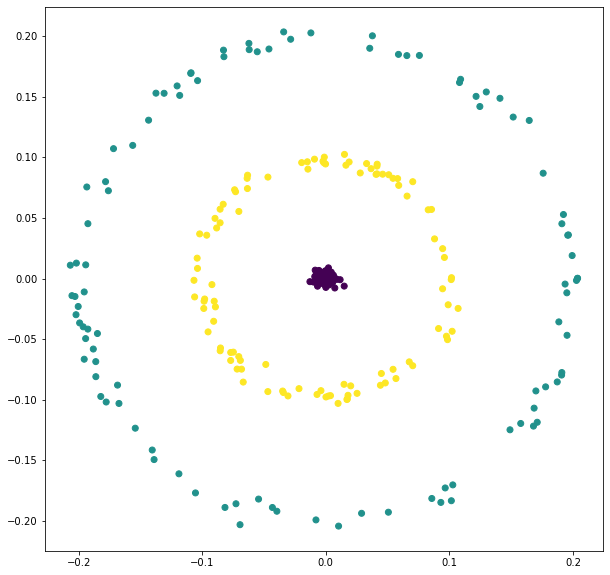

In [13]:
labels, embedding = spectral_clustering(data, k, gamma = 6000, init=kmeanspp)
plt.figure(figsize=(10, 10))
plt.scatter(data[:,0], data[:,1], c=labels)

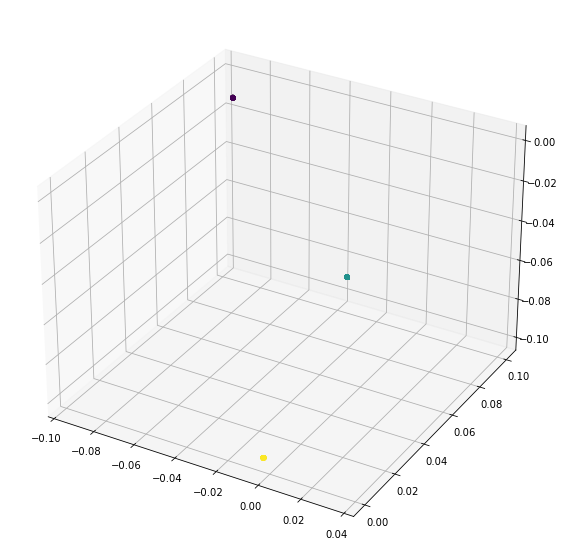

In [14]:
# show embeddings in 3D space
ax = plt.subplot(projection = '3d')
ax.figure.set_size_inches(10, 10)
ax.scatter(embedding[:,0], embedding[:,1], embedding[:,2], c=labels)

#### Discussion
**Q3: Discuss the effect of $\gamma$ on the clustering result through experiments and report your best choice of $\gamma$. *Hint: any $\gamma$ that gives a good visually result is fine. However, if you want to choose a best $\gamma$ in more complicated tasks, you may need to figure out how to measure the accuracy of clustering algorithms. We stored true labels in `true_labels` when generating the data, but a direct comparison between predicted labels and true labels is not reasonable.***

**Your answer:**